<a href="https://colab.research.google.com/github/jiwon5315/BusinessAnalystPortfolio/blob/main/DescriptiveAnalytics/Crowdfunding_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataCamp Competition task:
You are a data analyst at a crowdfunding site. For the next quarter, your company will be running a marketing campaign. The marketing manager wants to **target those segments that have donated the most** in the past year. She turned to you to help her with her upcoming meeting with the CEO.

💾 The data: crowdfunding.csv

In [ ]:
#Original data
df <- read.csv('/crowdfunding.csv')
head(df)

,category,device,gender,age,amount
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Fashion,iOS,F,45-54,61
2,Sports,android,M,18-24,31
3,Technology,android,M,18-24,39
4,Technology,iOS,M,18-24,36
5,Sports,android,M,18-24,40
6,Games,iOS,M,18-24,59


We will first do an exploratory data analysis of the dataset by asking the following questions:
*   What was the total donation amount and number of customers?
* What is the mean/median/min/maximum amount of donations per customer?
* Are there any outliers?

In [ ]:
summary(df)
#20,658 rows found/number of customers
#Mean of donation amount is $39.41
#Median - $39
#Minimum - $1
#Maximum - $101

   category            device             gender              age           
 Length:20658       Length:20658       Length:20658       Length:20658      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     amount      
 Min.   :  1.00  
 1st Qu.: 29.00  
 Median : 39.00  
 Mean   : 39.41  
 3rd Qu.: 50.00  
 Max.   :101.00  

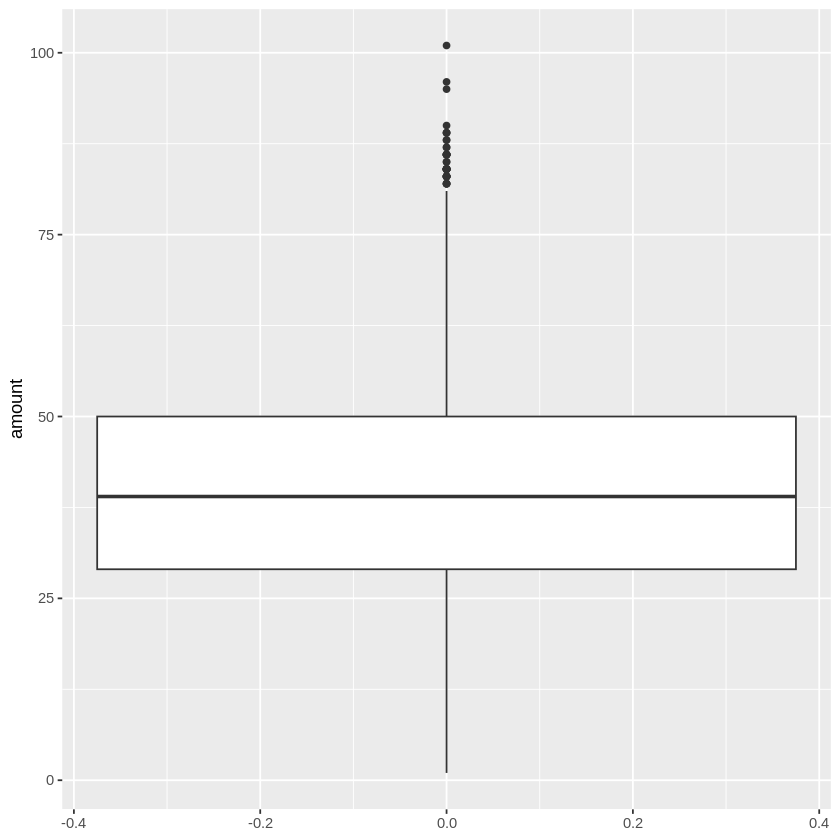

In [73]:
library(ggplot2)
ggplot(df, aes(y=amount))+geom_boxplot() #boxplot visualizes the donation amount distribution
#we can see outliers above $80 mark.

In [ ]:
library(dplyr)
df %>% summarise(sum(amount)) #total amount of donation equals $814,070


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




sum(amount)
<dbl>
814070


In [58]:
outlier <- df %>%
  subset(amount>80) %>%
  arrange(desc(amount))

head(outlier) #there are 60 people out of 20,658 who qualify as outliers with a donation amount higher than $80.

,category,device,gender,age,amount
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Technology,iOS,F,35-44,101
2,Games,iOS,M,35-44,96
3,Fashion,iOS,M,35-44,95
4,Sports,iOS,U,55+,90
5,Games,iOS,F,18-24,89
6,Technology,iOS,M,18-24,89


**Stats about Outliers**

In [40]:
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



total,percentage
<dbl>,<dbl>
5062,0.62


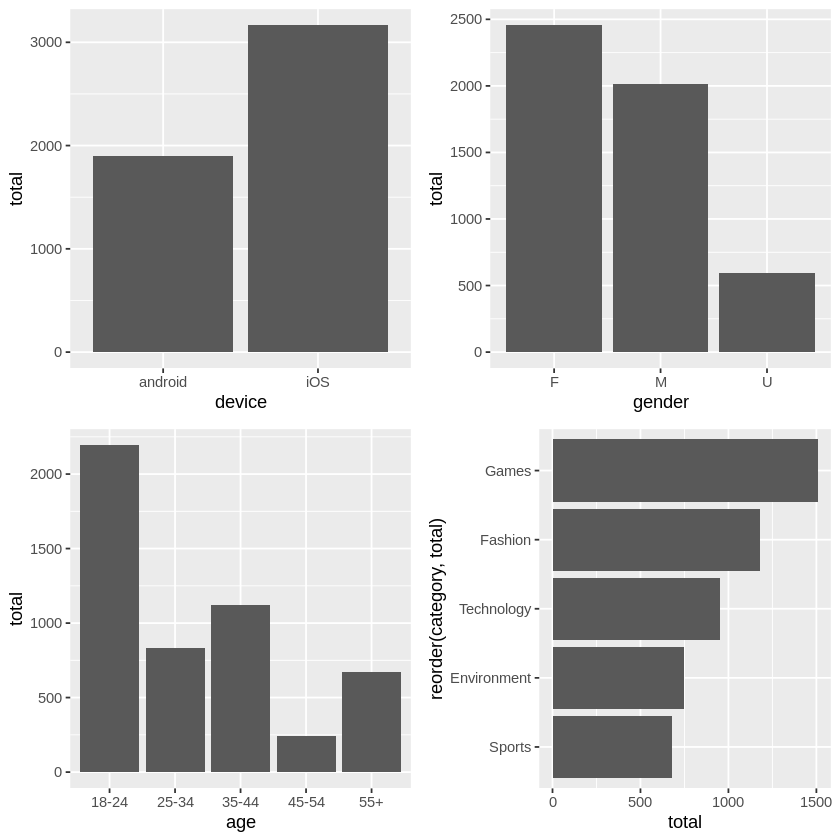

In [75]:
outlier %>% summarise(total=sum(amount),percentage=round(total/814070*100,2))
#outliers contributed $5,062
o1 <- outlier %>% group_by(gender) %>%
  summarise(total=sum(amount),count=n(),percentage=round(total/5062*100,2)) %>%
  arrange(desc(total))
#gender - females donated most
o2 <- outlier %>% group_by(device) %>%
  summarise(total=sum(amount),count=n(),percentage=round(total/5062*100,2)) %>%
  arrange(desc(total))
#device - iOS donated most
o3 <- outlier %>% group_by(category) %>%
  summarise(total=sum(amount),count=n(),percentage=round(total/5062*100,2)) %>%
  arrange(desc(total))
#category - Games and Fashion took up 53% of donations
o4 <- outlier %>% group_by(age) %>%
  summarise(total=sum(amount),count=n(),percentage=round(total/5062*100,2)) %>%
  arrange(desc(total))
#age - 18-24 year olds donated most
g1 <- ggplot(o1, aes(x=gender,y=total))+geom_bar(stat="identity")
g2 <- ggplot(o2, aes(x=device,y=total))+geom_bar(stat="identity")
g3 <- ggplot(o3, aes(x=reorder(category,total),y=total))+geom_bar(stat="identity")+coord_flip()
g4 <- ggplot(o4, aes(x=age,y=total))+geom_bar(stat="identity")
grid.arrange(g2, g1,g4, g3, nrow=2, ncol=2)

Let's zoom out and think about the big picture instead of the outliers.

In [59]:
install.packages("treemapify")
library(treemapify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘Rcpp’, ‘png’, ‘jpeg’, ‘shades’, ‘gridtext’, ‘ggfittext’




`summarise()` has grouped output by 'device', 'age', 'gender'. You can override
using the `.groups` argument.


$title
[1] "Tree Plot"

attr(,"class")
[1] "labels"

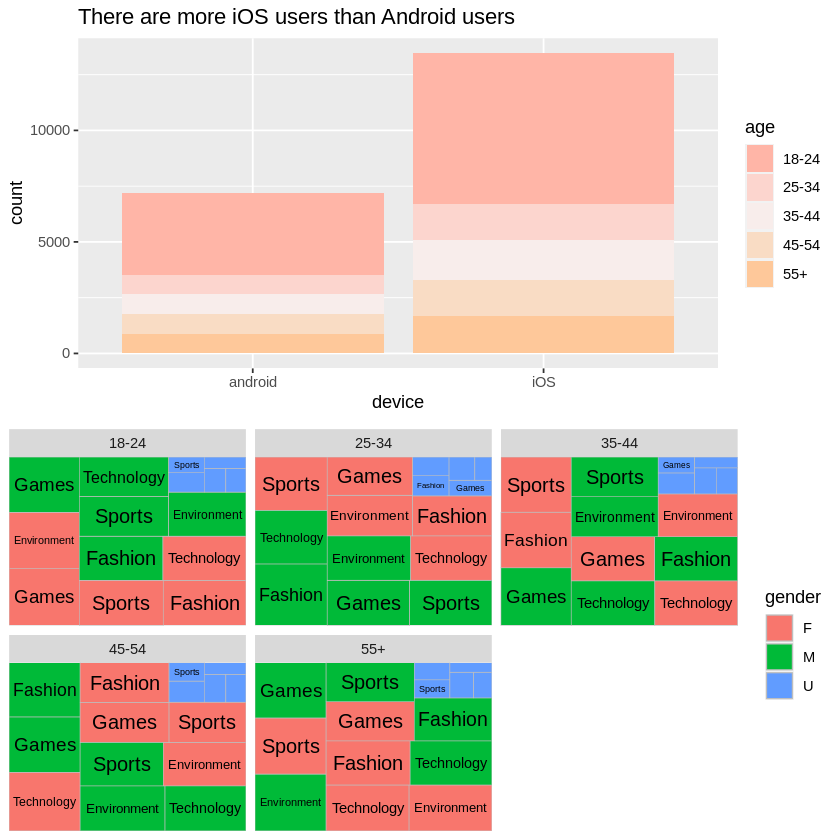

In [65]:
#device type with most number of contributions
g5 <- ggplot(df,aes(x=device,fill=age))+
	geom_bar()+
	scale_fill_manual(values=c("#ffb5a7","#fcd5ce","#f8edeb","#f9dcc4",
							  "#fec89a"))+
	ggtitle("There are more iOS users than Android users")

df2 <- df %>%
	group_by(device,age,gender,category) %>%
	summarise(total=sum(amount),count=n()) %>%
	arrange(desc(total))
ios <- df2 %>%
	subset(device=='iOS')
g6 <- ggplot2::ggplot(ios,aes(area=total,fill=gender,label=category))+
  treemapify::geom_treemap(layout="squarified")+
  geom_treemap_text(place = "centre",size = 12)+
  facet_wrap(~age)
  labs(title="Tree Plot")
# Plots
grid.arrange(g5, g6)

In [66]:
df2 %>% arrange(desc(total))
#There are 150 combinations of device x age x gender x category.
#Device - iOS; Age - 18-24;
#Gender - F; Category - Games, Environment, Sports, Fashion
#Gender - M; Category - Games, Fashion

device,age,gender,category,total,count
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
iOS,18-24,F,Games,26692,662
iOS,18-24,F,Environment,26331,666
iOS,18-24,M,Games,25949,653
iOS,18-24,F,Sports,25243,646
iOS,18-24,F,Fashion,24846,627
iOS,18-24,M,Fashion,24683,623
iOS,18-24,F,Technology,24495,627
iOS,18-24,M,Sports,23725,600
iOS,18-24,M,Technology,23395,593


Based on both the outlier and overall dataset analysis, it would be ideal to target **iOS 18-24 yr old female gamers** as it was the top category identified in both circumstances.

Games, Environment, Sports, Fashion categories within iOS users among 18-24 yr old F/M customers amounted to **25%** of total donations.
